This data is from the UCI Irvine Data Repository. The URL for the data is: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data. In this notebook, we will download the data using Pandas and do some basic analysis of the columns. Note that it is a comma-delimited file. Also, the file does not have column names.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", \
                header=None)

In [18]:
#display column names - should be numbers from 0 to 60; 0 through 59 are sonar readings and 60 is the target variable
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

The predictors/features in this problem are sonar measurements and the goal is to detect unexploded mines. Your prediction algorithm should be able to distinguish between mines and rocks. The target that you have to predict is the 60th column. 

In [19]:
#let us look at our target - R stands for "Rock" and M for "Mine"
df[60].head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [17]:
#how many rocks and mines do we have?
df[60].value_counts()


M    111
R     97
Name: 60, dtype: int64

In [20]:
#How many rows and columns do we have in our dataset?
df.shape

(208, 61)

In [22]:
#Let us get some basic column statistics
df.describe() #try transposing this

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [40]:
#let us get some information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

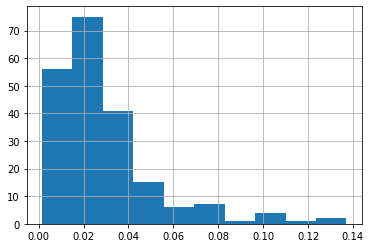

In [25]:
#let us look at the histogram of the first column
df[0].hist()

In [31]:
#let us separate the features from the target
features = df[df.columns[:-1]]
#features.head()
#let us create the target, but we need to convert it to 0s and 1s - mines will be 1 and rocks 0
target = df[60].map({"R": 0, "M": 1})
target.value_counts() #how many 1s and 0s do we have?


1    111
0     97
Name: 60, dtype: int64

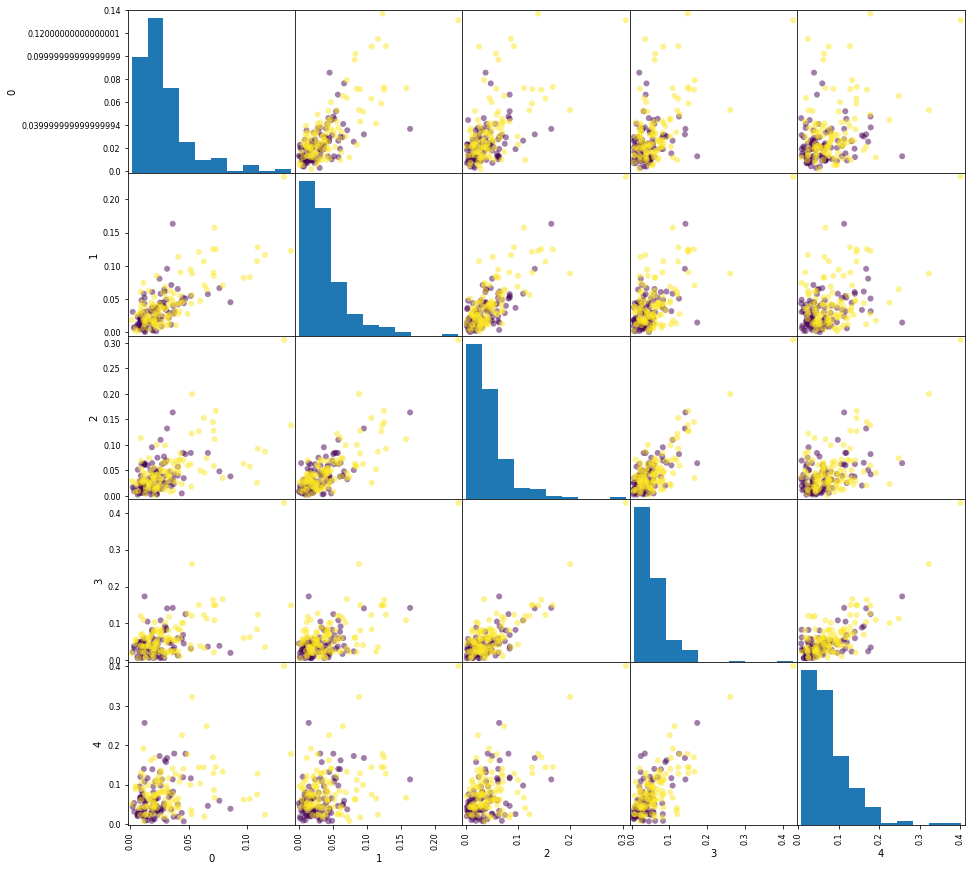

In [39]:
#let us try a scatter matrix of the first five features
pd.plotting.scatter_matrix(features[range(5)], c = target, figsize = (15,15), marker='o')
plt.show()

In [41]:
#Looks like some of the variables are correlated. Let us check it out for the first 5 predictors
df[range(5)].corr()

,0,1,2,3,4
0,1.000000,0.735896,0.571537,0.491438,0.344797
1,0.735896,1.000000,0.779916,0.606684,0.419669
2,0.571537,0.779916,1.000000,0.781786,0.546141
3,0.491438,0.606684,0.781786,1.000000,0.726943
4,0.344797,0.419669,0.546141,0.726943,1.000000


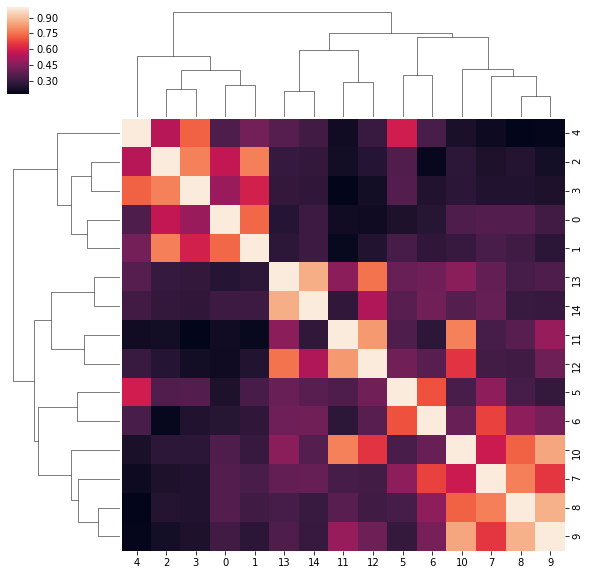

In [43]:
#let us use seaborn and get a cluster map of the first 15 variables
import seaborn as sns
correlations = df[range(15)].corr()
sns.clustermap(correlations)

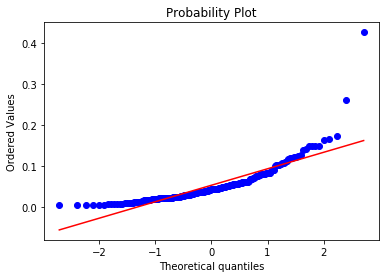

In [45]:
#Checking for outliers - quantile to quantile plot
import scipy .stats as stats
import pylab
stats.probplot(df[3], dist="norm", plot=pylab)
pylab.show()